In [38]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt


In [39]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('kaggle kernels output crohank/birds-classification-mobilenetv2-94-7-acc -p /path/to/dest'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [40]:
train_dir = "C:/Users/croha/Documents/Capstone/Birds Data/train"
test_dir = "C:/Users/croha/Documents/Capstone/Birds Data/test"
val_dir = "C:/Users/croha/Documents/Capstone/Birds Data/valid"

In [41]:
batch_size = 32
img_size = 150

In [42]:

train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_dir,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

validation_generator = val_datagen.flow_from_directory(val_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 102534 images belonging to 526 classes.
Found 2640 images belonging to 526 classes.
Found 2640 images belonging to 526 classes.


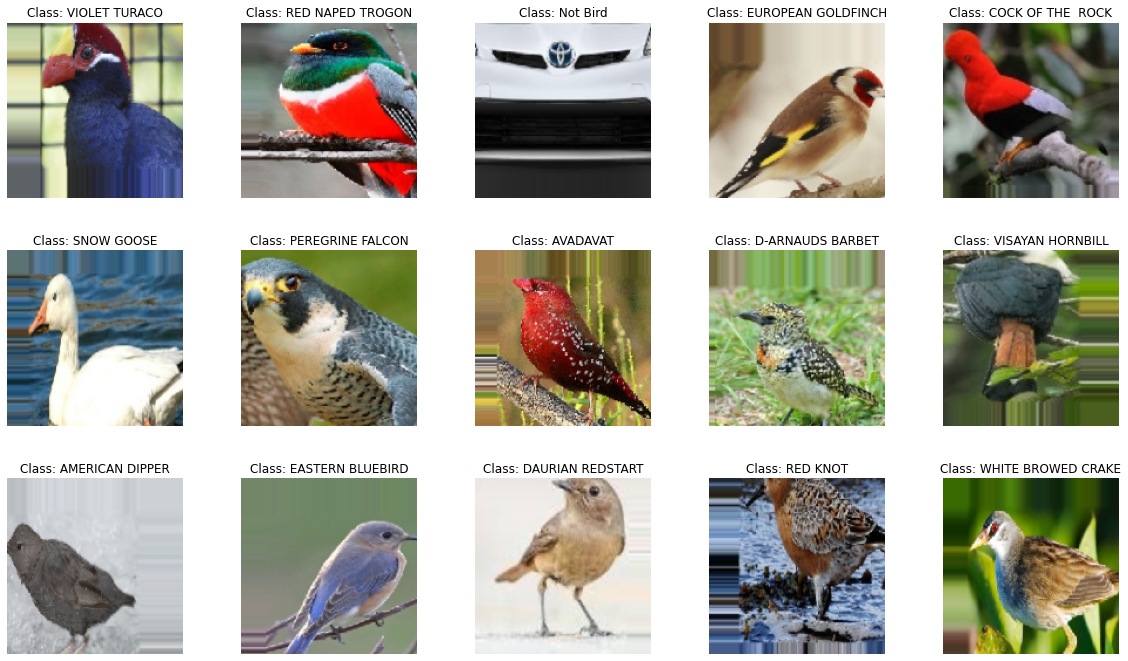

In [43]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [44]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(include_top = False,
                       weights = 'imagenet',
                       input_shape = (img_size,img_size,3))

In [45]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [46]:
num_layers = len(base_model.layers)
num_layers

154

In [47]:
for layer in base_model.layers[:num_layers//2]:
    layer.trainable = False

In [48]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [49]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # to prevent overfitting
model.add(Dense(526, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               16384512  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 526)               269838    
Total params: 18,912,334
Trainable params: 18,717,838
Non-trainable params: 194,496
_________________________________________________________________


In [51]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [52]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
3205/3205 [==============================] - 1465s 449ms/step - loss: 3.2827 - accuracy: 0.3779 - val_loss: 0.9442 - val_accuracy: 0.7527
Epoch 2/10
3205/3205 [==============================] - 1334s 416ms/step - loss: 1.3679 - accuracy: 0.6755 - val_loss: 0.5978 - val_accuracy: 0.8409
Epoch 3/10
3205/3205 [==============================] - 1256s 392ms/step - loss: 0.9593 - accuracy: 0.7645 - val_loss: 0.4740 - val_accuracy: 0.8822
Epoch 4/10
3205/3205 [==============================] - 1287s 401ms/step - loss: 0.7585 - accuracy: 0.8097 - val_loss: 0.4167 - val_accuracy: 0.8841
Epoch 5/10
3205/3205 [==============================] - 1212s 378ms/step - loss: 0.6348 - accuracy: 0.8374 - val_loss: 0.4180 - val_accuracy: 0.8917
Epoch 6/10
3205/3205 [==============================] - 1206s 376ms/step - loss: 0.5510 - accuracy: 0.8582 - val_loss: 0.3938 - val_accuracy: 0.9015
Epoch 7/10
3205/3205 [==============================] - 1199s 374ms/step - loss: 0.4910 - accuracy: 0.8712

In [53]:
model.save('model_bird_2.h5')

C:\Users\croha\anaconda3\envs\gpu2\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [54]:
bird_names = [
    "ABBOTTS BABBLER", "ABBOTTS BOOBY", "ABYSSINIAN GROUND HORNBILL",
    "AFRICAN CROWNED CRANE", "AFRICAN EMERALD CUCKOO", "AFRICAN FIREFINCH",
    "AFRICAN OYSTER CATCHER", "AFRICAN PIED HORNBILL", "AFRICAN PYGMY GOOSE",
    "ALBATROSS", "ALBERTS TOWHEE", "ALEXANDRINE PARAKEET", "ALPINE CHOUGH",
    "ALTAMIRA YELLOWTHROAT", "AMERICAN AVOCET", "AMERICAN BITTERN", "AMERICAN COOT",
    "AMERICAN FLAMINGO", "AMERICAN GOLDFINCH", "AMERICAN KESTREL", "AMERICAN PIPIT",
    "AMERICAN REDSTART", "AMERICAN ROBIN", "AMERICAN WIGEON", "AMETHYST WOODSTAR",
    "ANDEAN GOOSE", "ANDEAN LAPWING", "ANDEAN SISKIN", "ANHINGA", "ANIANIAU",
    "ANNAS HUMMINGBIRD", "ANTBIRD", "ANTILLEAN EUPHONIA", "APAPANE", "APOSTLEBIRD",
    "ARARIPE MANAKIN", "ASHY STORM PETREL", "ASHY THRUSHBIRD", "ASIAN CRESTED IBIS",
    "ASIAN DOLLARD BIRD", "ASIAN GREEN BEE EATER", "ASIAN OPENBILL STORK",
    "AUCKLAND SHAQ", "AUSTRAL CANASTERO", "AUSTRALASIAN FIGBIRD", "AVADAVAT",
    "AZARAS SPINETAIL", "AZURE BREASTED PITTA", "AZURE JAY", "AZURE TANAGER",
    "AZURE TIT", "BAIKAL TEAL", "BALD EAGLE", "BALD IBIS", "BALI STARLING",
    "BALTIMORE ORIOLE", "BANANAQUIT", "BAND TAILED GUAN", "BANDED BROADBILL",
    "BANDED PITA", "BANDED STILT", "BAR-TAILED GODWIT", "BARN OWL", "BARN SWALLOW",
    "BARRED PUFFBIRD", "BARROWS GOLDENEYE", "BAY-BREASTED WARBLER", "BEARDED BARBET",
    "BEARDED BELLBIRD", "BEARDED REEDLING", "BELTED KINGFISHER", "BIRD OF PARADISE",
    "BLACK AND YELLOW BROADBILL", "BLACK BAZA", "BLACK COCKATO", "BLACK FACED SPOONBILL",
    "BLACK FRANCOLIN", "BLACK HEADED CAIQUE", "BLACK NECKED STILT", "BLACK SKIMMER",
    "BLACK SWAN", "BLACK TAIL CRAKE", "BLACK THROATED BUSHTIT", "BLACK THROATED HUET",
    "BLACK THROATED WARBLER", "BLACK VENTED SHEARWATER", "BLACK VULTURE",
    "BLACK-CAPPED CHICKADEE", "BLACK-NECKED GREBE", "BLACK-THROATED SPARROW",
    "BLACKBURNIAM WARBLER", "BLONDE CRESTED WOODPECKER", "BLOOD PHEASANT",
    "BLUE COAU", "BLUE DACNIS", "BLUE GRAY GNATCATCHER", "BLUE GROSBEAK", "BLUE GROUSE",
    "BLUE HERON", "BLUE MALKOHA""BLUE THROATED TOUCANET",
    "BOBOLINK",
    "BORNEAN BRISTLEHEAD",
    "BORNEAN LEAFBIRD",
    "BORNEAN PHEASANT",
    "BRANDT CORMARANT",
    "BREWERS BLACKBIRD",
    "BROWN CREPPER",
    "BROWN HEADED COWBIRD",
    "BROWN NOODY",
    "BROWN THRASHER",
    "BUFFLEHEAD",
    "BULWERS PHEASANT",
    "BURCHELLS COURSER",
    "BUSH TURKEY",
    "CAATINGA CACHOLOTE",
    "CABOTS TRAGOPAN",
    "CACTUS WREN",
    "CALIFORNIA CONDOR",
    "CALIFORNIA GULL",
    "CALIFORNIA QUAIL",
    "CAMPO FLICKER",
    "CANARY",
    "CANVASBACK",
    "CAPE GLOSSY STARLING",
    "CAPE LONGCLAW",
    "CAPE MAY WARBLER",
    "CAPE ROCK THRUSH",
    "CAPPED HERON",
    "CAPUCHINBIRD",
    "CARMINE BEE-EATER",
    "CASPIAN TERN",
    "CASSOWARY",
    "CEDAR WAXWING",
    "CERULEAN WARBLER",
    "CHARA DE COLLAR",
    "CHATTERING LORY",
    "CHESTNET BELLIED EUPHONIA",
    "CHESTNUT WINGED CUCKOO",
    "CHINESE BAMBOO PARTRIDGE",
    "CHINESE POND HERON",
    "CHIPPING SPARROW",
    "CHUCAO TAPACULO",
    "CHUKAR PARTRIDGE",
    "CINNAMON ATTILA",
    "CINNAMON FLYCATCHER",
    "CINNAMON TEAL",
    "CLARKS GREBE",
    "CLARKS NUTCRACKER",
    "COCK OF THE ROCK",
    "COCKATOO",
    "COLLARED ARACARI",
    "COLLARED CRESCENTCHEST",
    "COMMON FIRECREST",
    "COMMON GRACKLE",
    "COMMON HOUSE MARTIN",
    "COMMON IORA",
    "COMMON LOON",
    "COMMON POORWILL",
    "COMMON STARLING",
    "COPPERSMITH BARBET",
    "COPPERY TAILED COUCAL",
    "CRAB PLOVER",
    "CRANE HAWK",
    "CREAM COLORED WOODPECKER",
    "CRESTED AUKLET",
    "CRESTED CARACARA",
    "CRESTED COUA",
    "CRESTED FIREBACK",
    "CRESTED KINGFISHER",
    "CRESTED NUTHATCH",
    "CRESTED OROPENDOLA",
    "CRESTED SERPENT EAGLE",
    "CRESTED SHRIKETIT",
    "CRESTED WOOD PARTRIDGE",
    "CRIMSON CHAT",
    "CRIMSON SUNBIRD",
    "CROW",
    "CUBAN TODY",
    "CUBAN TROGON",
    "CURL CRESTED ARACURI",
    "D-ARNAUDS BARBET",
    "DALMATIAN PELICAN",
    "DARJEELING WOODPECKER",
    "DARK EYED JUNCO",
    "DAURIAN REDSTART",
    "DEMOISELLE CRANE",
    "DOUBLE BARRED FINCH",
    "DOUBLE BRESTED CORMARANT",
    "DOUBLE EYED FIG PARROT",
    "DOWNY WOODPECKER",
    "DUSKY LORY",
    "DUSKY ROBIN",
    "EARED PITA",
    "EASTERN BLUEBIRD",
    "EASTERN BLUEBONNET",
    "EASTERN GOLDEN WEAVER",
    "EASTERN MEADOWLARK",
    "EASTERN ROSELLA","EASTERN TOWEE",
    "EASTERN WIP POOR WILL",
    "EASTERN YELLOW ROBIN",
    "ECUADORIAN HILLSTAR",
    "EGYPTIAN GOOSE",
    "ELEGANT TROGON",
    "ELLIOTS  PHEASANT",
    "EMERALD TANAGER",
    "EMPEROR PENGUIN",
    "EMU",
    "ENGGANO MYNA",
    "EURASIAN BULLFINCH",
    "EURASIAN GOLDEN ORIOLE",
    "EURASIAN MAGPIE",
    "EUROPEAN GOLDFINCH",
    "EUROPEAN TURTLE DOVE",
    "EVENING GROSBEAK",
    "FAIRY BLUEBIRD",
    "FAIRY PENGUIN",
    "FAIRY TERN",
    "FAN TAILED WIDOW",
    "FASCIATED WREN",
    "FIERY MINIVET",
    "FIORDLAND PENGUIN",
    "FIRE TAILLED MYZORNIS",
    "FLAME BOWERBIRD",
    "FLAME TANAGER",
    "FOREST WAGTAIL",
    "FRIGATE",
    "FRILL BACK PIGEON",
    "GAMBELS QUAIL",
    "GANG GANG COCKATOO",
    "GILA WOODPECKER",
    "GILDED FLICKER",
    "GLOSSY IBIS",
    "GO AWAY BIRD",
    "GOLD WING WARBLER",
    "GOLDEN BOWER BIRD",
    "GOLDEN CHEEKED WARBLER",
    "GOLDEN CHLOROPHONIA",
    "GOLDEN EAGLE",
    "GOLDEN PARAKEET",
    "GOLDEN PHEASANT",
    "GOLDEN PIPIT",
    "GOULDIAN FINCH",
    "GRANDALA",
    "GRAY CATBIRD",
    "GRAY KINGBIRD",
    "GRAY PARTRIDGE",
    "GREAT ARGUS",
    "GREAT GRAY OWL",
    "GREAT JACAMAR",
    "GREAT KISKADEE",
    "GREAT POTOO",
    "GREAT TINAMOU",
    "GREAT XENOPS",
    "GREATER PEWEE",
    "GREATER PRAIRIE CHICKEN",
    "GREATOR SAGE GROUSE",
    "GREEN BROADBILL",
    "GREEN JAY",
    "GREEN MAGPIE",
    "GREEN WINGED DOVE",
    "GREY CUCKOOSHRIKE",
    "GREY HEADED FISH EAGLE",
    "GREY PLOVER",
    "GROVED BILLED ANI",
    "GUINEA TURACO",
    "GUINEAFOWL",
    "GURNEYS PITTA",
    "GYRFALCON",
    "HAMERKOP",
    "HARLEQUIN DUCK",
    "HARLEQUIN QUAIL",
    "HARPY EAGLE",
    "HAWAIIAN GOOSE",
    "HAWFINCH",
    "HELMET VANGA",
    "HEPATIC TANAGER",
    "HIMALAYAN BLUETAIL",
    "HIMALAYAN MONAL",
    "HOATZIN",
    "HOODED MERGANSER",
    "HOOPOES",
    "HORNED GUAN",
    "HORNED LARK",
    "HORNED SUNGEM",
    "HOUSE FINCH",
    "HOUSE SPARROW",
    "HYACINTH MACAW",
    "IBERIAN MAGPIE",
    "IBISBILL",
    "IMPERIAL SHAQ",
    "INCA TERN",
    "INDIAN BUSTARD",
    "INDIAN PITTA",
    "INDIAN ROLLER",
    "INDIAN VULTURE",
    "INDIGO BUNTING",
    "INDIGO FLYCATCHER",
    "INLAND DOTTEREL","IVORY BILLED ARACARI",
    "IVORY GULL",
    "IWI",
    "JABIRU",
    "JACK SNIPE",
    "JACOBIN PIGEON",
    "JANDAYA PARAKEET",
    "JAPANESE ROBIN",
    "JAVA SPARROW",
    "JOCOTOCO ANTPITTA",
    "KAGU",
    "KAKAPO",
    "KILLDEAR",
    "KING EIDER",
    "KING VULTURE",
    "KIWI",
    "KOOKABURRA",
    "LARK BUNTING",
    "LAUGHING GULL",
    "LAZULI BUNTING",
    "LESSER ADJUTANT",
    "LILAC ROLLER",
    "LIMPKIN",
    "LITTLE AUK",
    "LOGGERHEAD SHRIKE",
    "LONG-EARED OWL",
    "LOONEY BIRDS",
    "LUCIFER HUMMINGBIRD",
    "MAGPIE GOOSE",
    "MALABAR HORNBILL",
    "MALACHITE KINGFISHER",
    "MALAGASY WHITE EYE",
    "MALEO",
    "MALLARD DUCK",
    "MANDRIN DUCK",
    "MANGROVE CUCKOO",
    "MARABOU STORK",
    "MASKED BOBWHITE",
    "MASKED BOOBY",
    "MASKED LAPWING",
    "MCKAYS BUNTING",
    "MERLIN",
    "MIKADO PHEASANT",
    "MILITARY MACAW",
    "MOURNING DOVE",
    "MYNA",
    "NICOBAR PIGEON",
    "NOISY FRIARBIRD",
    "NORTHERN BEARDLESS TYRANNULET",
    "NORTHERN CARDINAL",
    "NORTHERN FLICKER",
    "NORTHERN FULMAR",
    "NORTHERN GANNET",
    "NORTHERN GOSHAWK",
    "NORTHERN JACANA",
    "NORTHERN MOCKINGBIRD",
    "NORTHERN PARULA",
    "NORTHERN RED BISHOP",
    "NORTHERN SHOVELER",
    "OCELLATED TURKEY",
    "OKINAWA RAIL",
    "ORANGE BREASTED TROGON",
    "ORANGE BRESTED BUNTING",
    "ORIENTAL BAY OWL",
    "ORNATE HAWK EAGLE",
    "Not a Bird",
    "OSTRICH",
    "OVENBIRD",
    "OYSTER CATCHER",
    "PAINTED BUNTING",
    "PALILA",
    "PALM NUT VULTURE",
    "PARADISE TANAGER",
    "PARAKETT AKULET",
    "PARUS MAJOR",
    "PATAGONIAN SIERRA FINCH",
    "PEACOCK",
    "PEREGRINE FALCON",
    "PHAINOPEPLA",
    "PHILIPPINE EAGLE",
    "PINK ROBIN",
    "PLUSH CRESTED JAY",
    "POMARINE JAEGER",
    "PUFFIN",
    "PUNA TEAL",
    "PURPLE FINCH",
    "PURPLE GALLINULE",
    "PURPLE MARTIN",
    "PURPLE SWAMPHEN",
    "PYGMY KINGFISHER",
    "PYRRHULOXIA",
    "QUETZAL",
    "RAINBOW LORIKEET",
    "RAZORBILL",
    "RED BEARDED BEE EATER",
    "RED BELLIED PITTA",
    "RED BILLED TROPICBIRD",
    "RED BROWED FINCH",
    "RED FACED CORMORANT",
    "RED FACED WARBLER","RED FODY",
    "RED HEADED DUCK",
    "RED HEADED WOODPECKER",
    "RED KNOT",
    "RED LEGGED HONEYCREEPER",
    "RED NAPED TROGON",
    "RED SHOULDERED HAWK",
    "RED TAILED HAWK",
    "RED TAILED THRUSH",
    "RED WINGED BLACKBIRD",
    "RED WISKERED BULBUL",
    "REGENT BOWERBIRD",
    "RING-NECKED PHEASANT",
    "ROADRUNNER",
    "ROCK DOVE",
    "ROSE BREASTED COCKATOO",
    "ROSE BREASTED GROSBEAK",
    "ROSEATE SPOONBILL",
    "ROSY FACED LOVEBIRD",
    "ROUGH LEG BUZZARD",
    "ROYAL FLYCATCHER",
    "RUBY CROWNED KINGLET",
    "RUBY THROATED HUMMINGBIRD",
    "RUDDY SHELDUCK",
    "RUDY KINGFISHER",
    "RUFOUS KINGFISHER",
    "RUFOUS TREPE",
    "RUFUOS MOTMOT",
    "SAMATRAN THRUSH",
    "SAND MARTIN",
    "SANDHILL CRANE",
    "SATYR TRAGOPAN",
    "SAYS PHOEBE",
    "SCARLET CROWNED FRUIT DOVE",
    "SCARLET FACED LIOCICHLA",
    "SCARLET IBIS",
    "SCARLET MACAW",
    "SCARLET TANAGER",
    "SHOEBILL",
    "SHORT BILLED DOWITCHER",
    "SMITHS LONGSPUR",
    "SNOW GOOSE",
    "SNOW PARTRIDGE",
    "SNOWY EGRET",
    "SNOWY OWL",
    "SNOWY PLOVER",
    "SORA",
    "SPANGLED COTINGA",
    "SPLENDID WREN",
    "SPOON BILED SANDPIPER",
    "SPOTTED CATBIRD",
    "SPOTTED WHISTLING DUCK",
    "SQUACCO HERON",
    "SRI LANKA BLUE MAGPIE",
    "STEAMER DUCK",
    "STORK BILLED KINGFISHER",
    "STRIATED CARACARA",
    "STRIPED OWL",
    "STRIPPED MANAKIN",
    "STRIPPED SWALLOW",
    "SUNBITTERN",
    "SUPERB STARLING",
    "SURF SCOTER",
    "SWINHOES PHEASANT",
    "TAILORBIRD",
    "TAIWAN MAGPIE",
    "TAKAHE",
    "TASMANIAN HEN",
    "TAWNY FROGMOUTH",
    "TEAL DUCK",
    "TIT MOUSE",
    "TOUCHAN",
    "TOWNSENDS WARBLER",
    "TREE SWALLOW",
    "TRICOLORED BLACKBIRD",
    "TROPICAL KINGBIRD",
    "TRUMPTER SWAN",
    "TURKEY VULTURE",
    "TURQUOISE MOTMOT",
    "UMBRELLA BIRD",
    "VARIED THRUSH",
    "VEERY",
    "VENEZUELIAN TROUPIAL",
    "VERDIN",
    "VERMILION FLYCATHER",
    "VICTORIA CROWNED PIGEON",
    "VIOLET BACKED STARLING",
    "VIOLET CUCKOO",
    "VIOLET GREEN SWALLOW",
    "VIOLET TURACO",
    "VISAYAN HORNBILL",
    "VULTURINE GUINEAFOWL",
    "WALL CREAPER",
    "WATTLED CURASSOW",
    "WATTLED LAPWING",
    "WHIMBREL",
    "WHITE BREASTED WATERHEN",
    "WHITE BROWED CRAKE",
    "WHITE CHEEKED TURACO",
    "WHITE CRESTED HORNBILL",
    "WHITE EARED HUMMINGBIRD",
    "WHITE NECKED RAVEN",
    "WHITE TAILED TROPIC",
    "WHITE THROATED BEE EATER",
    "WILD TURKEY",
    "WILLOW PTARMIGAN",
    "WILSONS BIRD OF PARADISE",
    "WOOD DUCK",
    "WOOD THRUSH",
    "WOODLAND KINGFISHER",
    "WRENTIT",
    "YELLOW BELLIED FLOWERPECKER",
    "YELLOW CACIQUE",
    "YELLOW HEADED BLACKBIRD",
    "ZEBRA DOVE",
    "YELLOW BREASTED CHAT",
    "RED CROSSBILL",
    "AMERICAN DIPPER",
    "BLUE THROATED PIPING GUAN",
    "OILBIRD",
    "DUNLIN",
    "SNOWY SHEATHBILL",
    "KNOB BILLED DUCK",
    "GREY HEADED CHACHALACA",
    "BLACK BREASTED PUFFBIRD","Not Bird"]

In [55]:
bird_names = sorted(bird_names)

In [57]:
print(bird_names)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

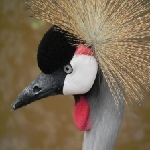

In [60]:
from keras.preprocessing import image
test_image = image.load_img('C:/Users/croha/Documents/Capstone/Birds Data/test/AFRICAN CROWNED CRANE/1.jpg',
                            target_size = (150, 150))
test_image

In [62]:
test_image2 = image.img_to_array(test_image)
test_image2 = np.expand_dims(test_image2,axis=0)
result = model.predict(test_image2/255.0)
max_index = np.argmax(result)
print("The bird in the picture is '" +bird_names[max_index]+"'")

The bird in the picture is 'AFRICAN CROWNED CRANE'


In [63]:
from tensorflow import keras,lite

In [65]:
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\croha\AppData\Local\Temp\tmpxae5rvv2\assets


INFO:tensorflow:Assets written to: C:\Users\croha\AppData\Local\Temp\tmpxae5rvv2\assets
C:\Users\croha\anaconda3\envs\gpu2\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [66]:
open("mobile.tflite", "wb").write(tfmodel)

75487152

In [67]:
import tensorflow as tf
model = tf.keras.models.load_model('model_bird_2.h5')